# Alpha Vantage Data Analysis
An analysis of stock data from Alpha Vantage. Below, a specific stock is chosen.

In [1]:
ticker = 'AAPL'

Now, data is donwloaded for the stock and saved. Remember that Alpha Vantage has a limited amount of calls per day and minute!

In [2]:
import save_data_to_csv

save_data_to_csv.save_dataset(ticker)

## Adjusted Price and Volume Graphs
The data is imported from where it is saved and plotted.

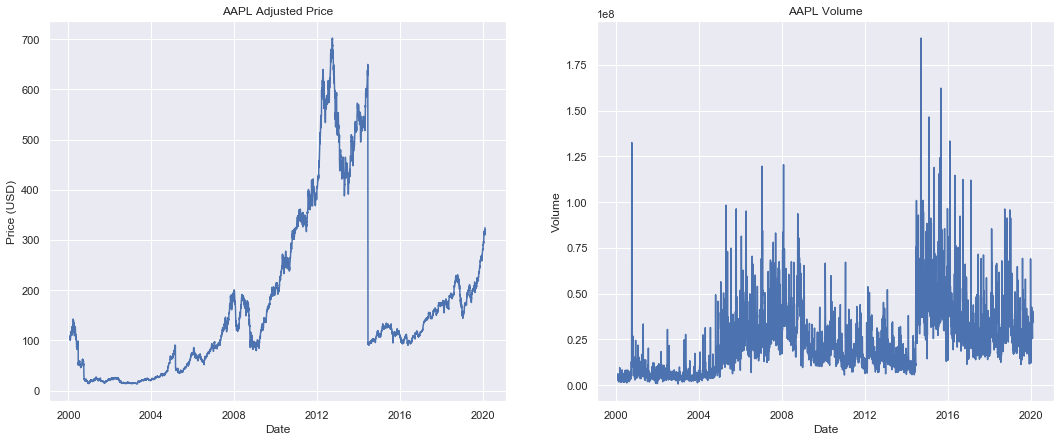

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Get data and make a datetime index
data = pd.read_csv(f'./Stock Data/{ticker}_daily_adjusted.csv')
data.set_index(pd.to_datetime(data['date']), inplace=True)
data.drop(columns='date', inplace=True)

# Make graphs
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(data.index, data.loc[:, '1. open'])
ax[0].set_title(ticker + ' Adjusted Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price (USD)')

ax[1].plot(data.index, data.loc[:, '6. volume'])
ax[1].set_title(ticker + ' Volume')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume');

## Technical Indicators
Techincal indicators are downloaded.

In [9]:
import save_ti_to_csv

save_ti_to_csv.save_ti(ticker)

Tehnical indicators are added to the data and plotted.

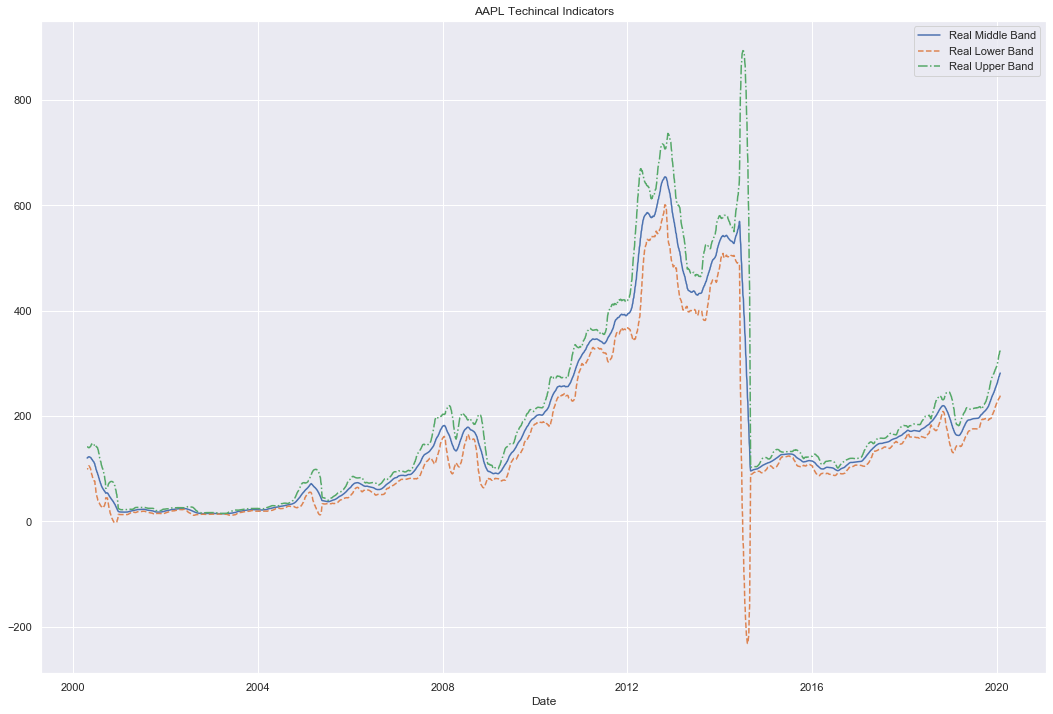

In [39]:
# Technical indicators added
ti = pd.read_csv(f'./Stock Data/{ticker}_daily_ti.csv')
ti.set_index(pd.to_datetime(ti['date']), inplace=True)
ti.drop(columns='date', inplace=True)
data = data.join(ti, on='date').dropna()

# Technical indicators plotted
plt.figure(figsize=(18, 12))
plt.plot(data.index, data['Real Middle Band'], label='Real Middle Band')
plt.plot(data.index, data['Real Lower Band'], label='Real Lower Band',
         linestyle='--')
plt.plot(data.index, data['Real Upper Band'], label='Real Upper Band',
         linestyle='-.')
plt.xlabel('Date')
plt.title(ticker + ' Techincal Indicators')
plt.legend();

## Predictive Modeling
Here, preditive modeling is perfromed on the data.
### Preprocessing
The data is preprocessed.

In [52]:
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Real Middle Band,Real Lower Band,Real Upper Band
date,,,,,,,,,,,
2020-01-28,312.60,318.40,312.1900,317.69,317.6900,34188986.0,0.0,1.0,281.6455,238.8387,324.4523
2020-01-27,310.06,311.77,304.8800,308.95,308.9500,40485005.0,0.0,1.0,280.4050,237.5344,323.2756
2020-01-24,320.25,323.33,317.5188,318.31,318.3100,36634380.0,0.0,1.0,279.3107,236.0601,322.5612
2020-01-23,317.92,319.56,315.6500,319.23,319.2300,26117993.0,0.0,1.0,278.1563,235.4371,320.8755
2020-01-22,318.58,319.99,317.3100,317.70,317.7000,25458115.0,0.0,1.0,276.9455,234.8377,319.0533
...,...,...,...,...,...,...,...,...,...,...,...
2000-04-27,117.19,127.00,116.5800,126.75,3.9383,2916100.0,0.0,1.0,121.7157,102.4834,140.9479
2000-04-26,126.62,128.00,120.0000,121.31,3.7693,3276000.0,0.0,1.0,121.2740,101.3209,141.2271
2000-04-25,122.12,128.75,122.0600,128.31,3.9868,3496800.0,0.0,1.0,120.9813,100.5300,141.4327


In [51]:
from sklearn.preprocessing import Normalizer

# Number of historical points needed to make next prediction
hist_num = 50

# Get data in an array without dates
X = data.sort_index().values

# Normalize data
X = Normalizer().fit_transform(X)

# Get data ready for model. Model shoudl make a predicton based on 50 observations.
y = np.array(X[:, 0][i + history_points] for i in range(X.shape[0] - hist_num))
y = np.expand_dims(y, -1)
X = np.array([X[i:i+hist_num] for i in range(X.shape[0] - hist_num)])
